In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#flights = pd.read_csv("d:/flights.csv")
flights = pd.read_csv("flights.csv")
flights.tail()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
160749,2013,9,30,2105.0,-1.0,2329.0,-25.0,UA,N477UA,475,EWR,IAH,175.0,1400,21.0,5.0
160750,2013,9,30,2121.0,21.0,2349.0,-25.0,DL,N193DN,2363,JFK,LAX,296.0,2475,21.0,21.0
160751,2013,9,30,2140.0,0.0,10.0,-30.0,AA,N335AA,185,JFK,LAX,298.0,2475,21.0,40.0
160752,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,523,EWR,BOS,37.0,200,21.0,49.0
160753,2013,9,30,2233.0,80.0,112.0,42.0,UA,N578UA,471,EWR,SFO,318.0,2565,22.0,33.0


In [3]:
# เลือกข้อมูลที่มี missing value อย่างน้อย 1 ตัวในแต่ละแถว
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [4]:
# เลือก arr_delay ที่มีค่า missing value
flights1 = flights[ flights['arr_delay'].isnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [5]:
# Find the number of non-missing values in each column
# นับจำนวนที่ไม่ใช่ missing value ของแต่ละ attribute
flights.count()

year         160754
month        160754
day          160754
dep_time     158418
dep_delay    158418
arr_time     158275
arr_delay    157927
carrier      160754
tailnum      159321
flight       160754
origin       160754
dest         160754
air_time     157927
distance     160754
hour         158418
minute       158418
dtype: int64

In [6]:
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


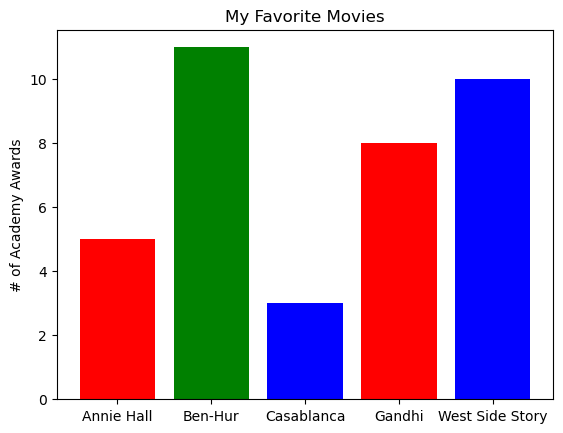

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

xs = range(len(movies)) # xs is range(5)

# plot bars with left x-coordinates [xs], ?# heights [num_oscars]
plt.bar(xs, num_oscars, color=('r','g','b','r','b'))
#plt.bar(xs, num_oscars)

# label x-axis with movie names at bar centers
plt.xticks(xs, movies)

# alternatively, use the following to replace ?# the two lines above
#plt.bar(xs, num_oscars, tick_label=movies)

plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.show()

In [13]:
df = pd.read_csv("Salaries.csv")
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [14]:
#Show graphs withint Python notebook
%matplotlib inline

Axes(0.125,0.11;0.775x0.77)


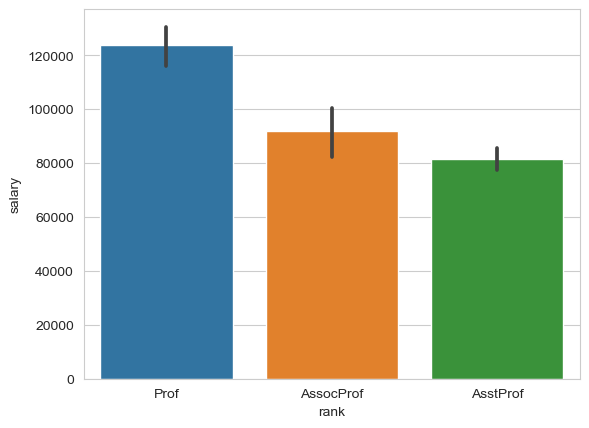

In [15]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")
#ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)
print(sns.barplot(x='rank',y ='salary', data=df))

<Axes: xlabel='rank', ylabel='salary'>

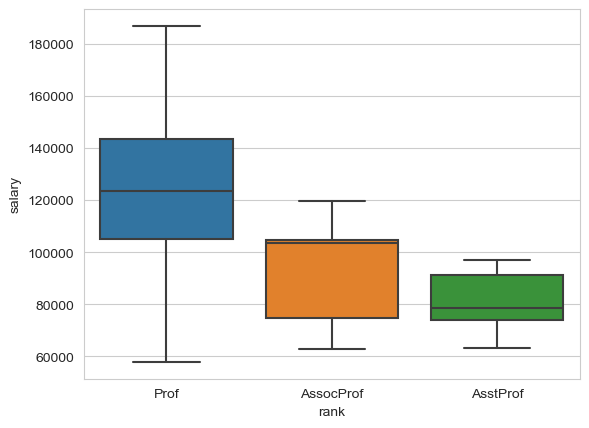

In [16]:
# box plot
sns.boxplot(x='rank',y='salary', data=df)

In [8]:
# เลือกข้อมูลทั้งหมดที่ตัด missing value ออกไป
flights2_nomissing = flights.dropna()
flights2_nomissing.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
5,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0
6,2013,1,1,558.0,-2.0,924.0,7.0,UA,N29129,194,JFK,LAX,345.0,2475,5.0,58.0
7,2013,1,1,558.0,-2.0,923.0,-14.0,UA,N53441,1124,EWR,SFO,361.0,2565,5.0,58.0
8,2013,1,1,559.0,-1.0,941.0,31.0,AA,N3DUAA,707,LGA,DFW,257.0,1389,5.0,59.0
9,2013,1,1,559.0,-1.0,854.0,-8.0,UA,N76515,1187,EWR,LAS,337.0,2227,5.0,59.0


<Axes: ylabel='salary'>

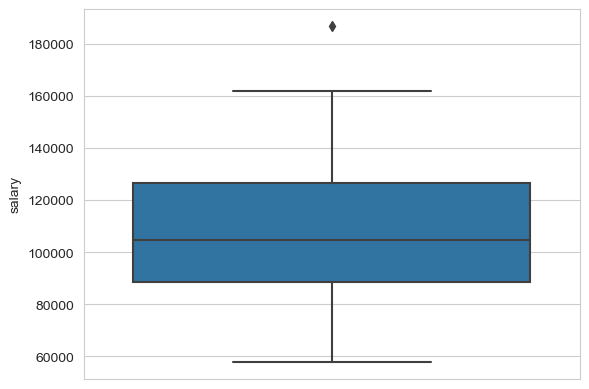

In [17]:
sns.boxplot(y='salary', data=df)

<Axes: xlabel='salary'>

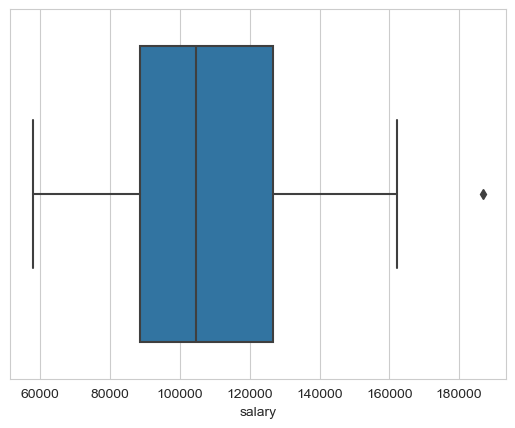

In [19]:
sns.boxplot(x='salary', data=df)

<Axes: xlabel='rank', ylabel='salary'>

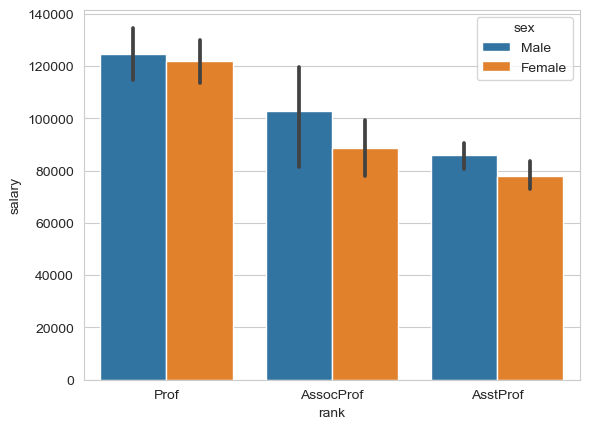

In [20]:
# Split into 2 groups:
#ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len) 
sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=np.mean)

C:\Users\Guest-Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guest-Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rank', ylabel='salary'>

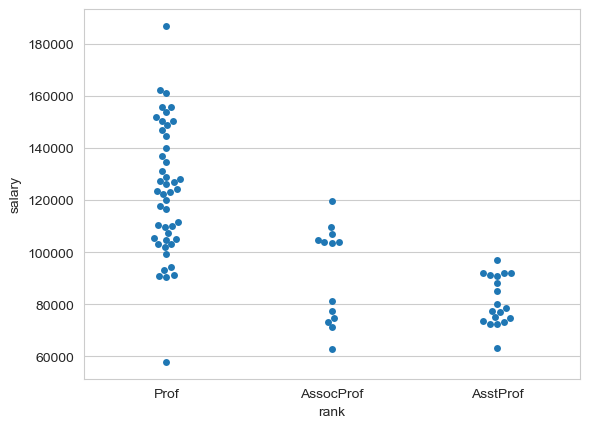

In [22]:
# swarm plot
sns.swarmplot(x='rank',y='salary', data=df)

C:\Users\Guest-Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guest-Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guest-Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


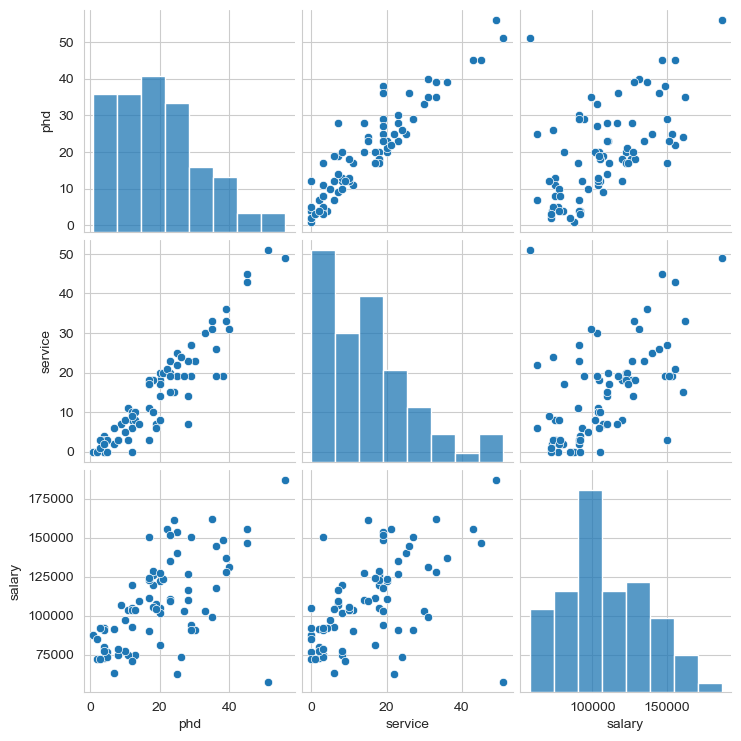

In [21]:
# Pairplot 
sns.pairplot(df)

# งานจ้าาา

In [23]:
df = pd.read_csv("housing.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
#1. ตรวจสอบว่ามีข้อมูลแถวไหนบ้างที่มีค่า missing และแสดงผลออกมา
df[df.isnull().any(axis=1)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
#2. จากคําตอบในข้อ 2 ให้เปลี่ยนค่า missing ที่อยู่ใน column name PoolQC ด้วย 9 และแสดงผลออกมา
print("any missing", df[ df['PoolQC'].isnull( )].any())
print("any missing after fill missing",df['PoolQC'].fillna(9).isnull().any())

any missing Id               True
MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 81, dtype: bool
any missing after fill missing False


In [60]:
#3. จากคําตอบในขอ 2 ให้เปลี่ยนค่า missing -ของ LotFrontage ด้วยค่าเฉลี่ยของ LotFrontage และแสดงผลออกมา
mean_LotFrontage = df['LotFrontage'].mean() 
average_nomiss =df['LotFrontage'].fillna(mean_LotFrontage)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

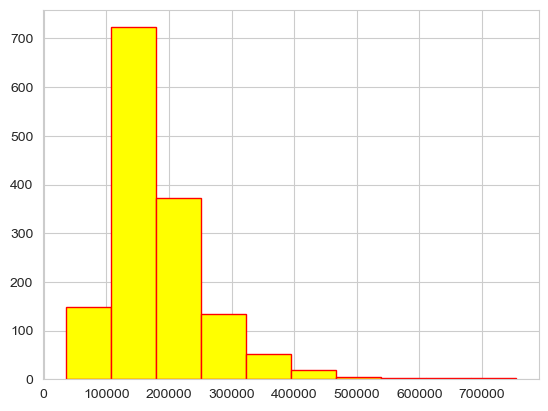

In [61]:
#4. ใช้matplotlib เพื่อสร้าง histogram ที่แสดงข้อมูล SalePrice เป็น 10 ช่วง สีของ histogram เป็นสีเหลือง และขอบของ histogram เป็นแดง
plt.hist(df['SalePrice'],bins=10, color = 'yellow', edgecolor = 'red')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

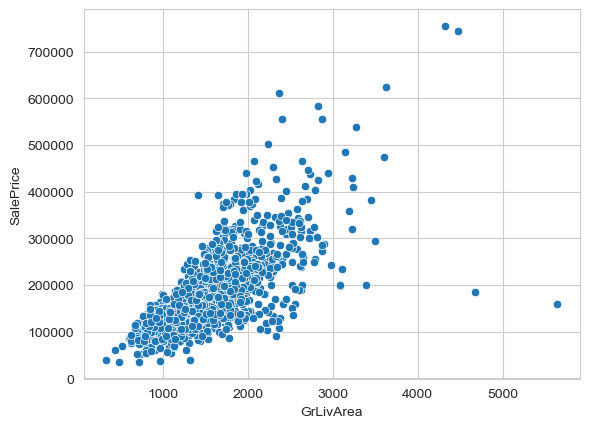

In [62]:
#5.ใช้seaborn เพื่อสร้าง scatter plot ระหว่าง GrLivArea, SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

<Axes: ylabel='SalePrice'>

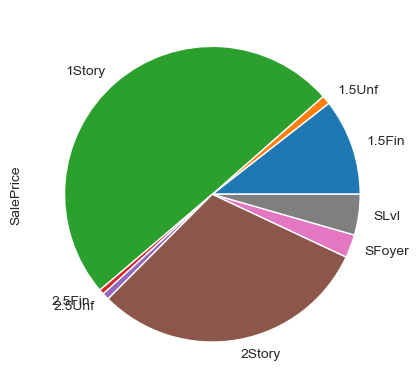

In [44]:
#6. สร้างกราฟวงกลมที่แสดงความสัมพันธ์ระหว่างลักษณะของบ้าน (HouseStyle) กับ ราคาขายบ้าน
df.groupby(['HouseStyle'])['SalePrice'].count().plot(kind='pie')

C:\Users\Guest-Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

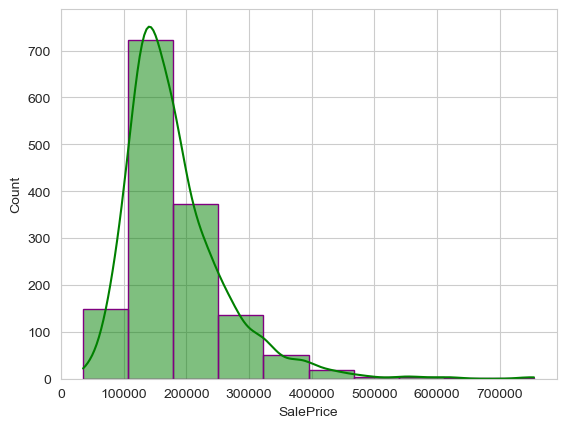

In [45]:
#7. ใช้seaborn เพื่อสร้าง histogram ที่แสดงข้อมูล SalePrice เป็น 10 ช่วง สีของ histogram เป็นเขียวและขอบของ histogram สีม่วง
sns.histplot(df['SalePrice'],bins = 10, color='green',edgecolor='purple',kde=True)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

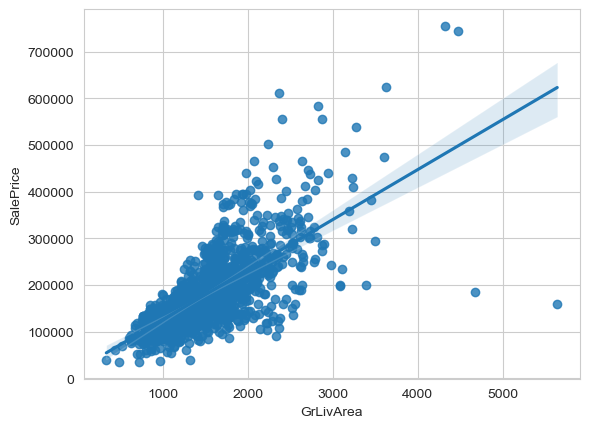

In [46]:
#8. ใช้seaborn เพื่อสร้าง linear regression plot ระหว่าง GrLivArea, SalePrice
sns.regplot(x='GrLivArea', y='SalePrice', data=df)

In [49]:
#9. หาค่าสถิติพื้นฐานของ LotArea
df.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a40ba32b90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a40ba3c410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a40ba32250>],
 'medians': [<matplotlib.lines.Line2D at 0x1a40ba3d8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a40ba3e310>],
 'means': []}

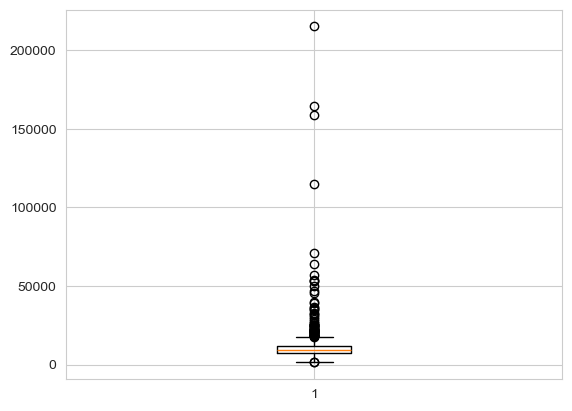

In [54]:
#10. plot boxplot ของ LotArea
plt.boxplot(df['LotArea'])